The shape of the input table is (8760, 10)
The shape of the input train_x is (8758, 1, 10)
The shape of the input train_y is (8758, 1, 1)
--------------------------------------------------
The shape of the input table is (8760, 10)
The shape of the input train_x is (8758, 1, 10)
The shape of the input train_y is (8758, 1, 1)
--------------------------------------------------
The shape of the input table is (8760, 10)
The shape of the input train_x is (8758, 1, 10)
The shape of the input train_y is (8758, 1, 1)
--------------------------------------------------
The shape of the input table is (8760, 10)
The shape of the input train_x is (8758, 1, 10)
The shape of the input train_y is (8758, 1, 1)
--------------------------------------------------
The shape of the input table is (8760, 10)
The shape of the input train_x is (8758, 1, 10)
The shape of the input train_y is (8758, 1, 1)
--------------------------------------------------
The shape of the input table is (8760, 10)
The shape of

Epoch 67/100
2766/2766 - 9s - loss: 13.7252 - val_loss: 19.6970 - 9s/epoch - 3ms/step
Epoch 68/100
2766/2766 - 9s - loss: 13.7900 - val_loss: 19.8320 - 9s/epoch - 3ms/step
Epoch 69/100
2766/2766 - 9s - loss: 13.6632 - val_loss: 19.3058 - 9s/epoch - 3ms/step
Epoch 70/100
2766/2766 - 9s - loss: 13.6968 - val_loss: 19.9680 - 9s/epoch - 3ms/step
Epoch 71/100
2766/2766 - 9s - loss: 13.7472 - val_loss: 19.5005 - 9s/epoch - 3ms/step
Epoch 72/100
2766/2766 - 9s - loss: 13.7109 - val_loss: 19.9984 - 9s/epoch - 3ms/step
Epoch 73/100
2766/2766 - 9s - loss: 13.6946 - val_loss: 19.2238 - 9s/epoch - 3ms/step
Epoch 74/100
2766/2766 - 9s - loss: 13.6610 - val_loss: 19.9163 - 9s/epoch - 3ms/step
Epoch 75/100
2766/2766 - 9s - loss: 13.6190 - val_loss: 19.7169 - 9s/epoch - 3ms/step
Epoch 76/100
2766/2766 - 8s - loss: 13.6294 - val_loss: 19.4451 - 8s/epoch - 3ms/step
Epoch 77/100
2766/2766 - 9s - loss: 13.6330 - val_loss: 19.8717 - 9s/epoch - 3ms/step
Epoch 78/100
2766/2766 - 9s - loss: 13.6431 - val_loss

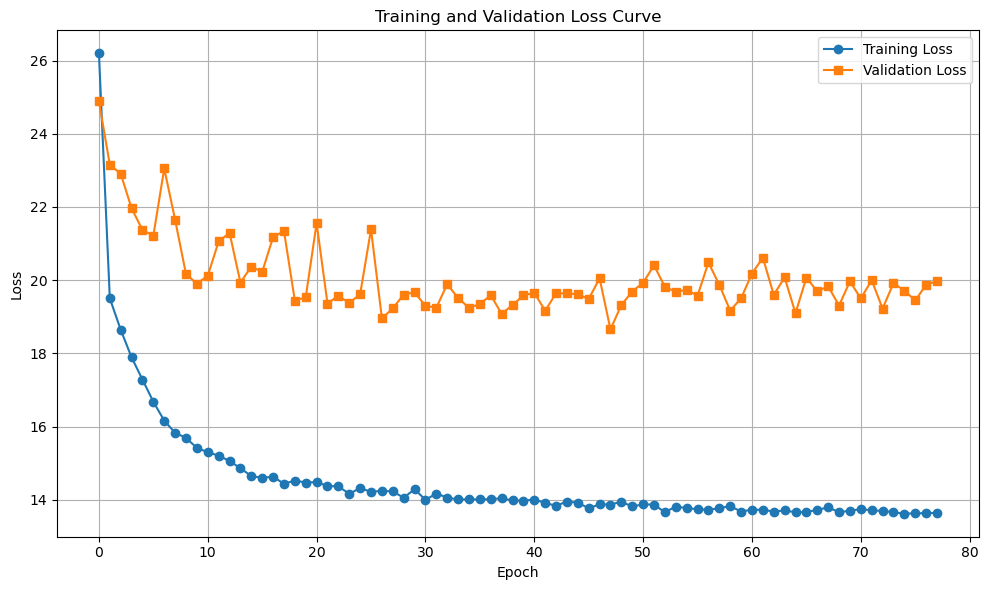

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from math import sqrt

from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import load_model, Model

import datetime
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.layers.convolutional import Conv1D 
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Bidirectional

from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

import pandas as pd
import numpy as np
import math ,time
import tensorflow as tf
from ncps.tf import CfC
import numpy as np
import os
from tensorflow import keras
from ncps import wirings
from ncps.tf import LTC
from ncps.tf import CfC, LTC
from ncps.wirings import AutoNCP



# In[4]:


window = 1
lstm_units = 10
dropout = 0.01


# In[5]:



df_14, df_15, df_16, df_17, df_18, df_19, df_20 = [pd.read_csv(fr"C:\Users\Khalid\Downloads\Taipei_{i}.csv") 
                                                   for i in range(14,21)]

# In[13]:


def get_X_and_Y(table, station_name = 'Banqiao'):
    table = table[table.SiteEngName =='Banqiao']
    features=table[['AMB_TEMP', 'CO', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5','RAINFALL', 'RH']]
    print(f'The shape of the input table is {features.shape}')
    data = np.array(features.values.reshape((-1,10*1)))
    timestep=1
    x_build = []
    for i in range(data.shape[0] - timestep - timestep):
        x_build.append(data[i:i+timestep])
    train_x = np.array(x_build)
    print(f'The shape of the input train_x is {train_x.shape}')


    data = np.array(table['PM2.5'].values.reshape((-1, 1)))
    y_build = []
    for i in range(timestep, data.shape[0] - timestep):
        y_build.append(data[i:i+timestep])
    train_y = np.array(y_build)
    print(f'The shape of the input train_y is {train_y.shape}')
    print('-'*50)
    return (train_x, train_y)

train14_x, train14_y = get_X_and_Y(df_14, station_name = 'Banqiao')
train15_x, train15_y = get_X_and_Y(df_15, station_name = 'Banqiao')
train16_x, train16_y = get_X_and_Y(df_16, station_name = 'Banqiao')
train17_x, train17_y = get_X_and_Y(df_17, station_name = 'Banqiao')
train18_x, train18_y = get_X_and_Y(df_18, station_name = 'Banqiao')
train19_x, train19_y = get_X_and_Y(df_19, station_name = 'Banqiao')
train20_x, train20_y = get_X_and_Y(df_20, station_name = 'Banqiao')


# In[14]:


train_X=np.concatenate((train14_x,train15_x,train16_x,train17_x,train18_x,train19_x),axis=0)
print(train_X.shape)
train_y=np.concatenate((train14_y,train15_y,train16_y,train17_y,train18_y,train19_y),axis=0)
print(train_y.shape)
test_X=train20_x;test_y=train20_y
print(train20_x.shape,train20_y.shape)


# In[15]:


from sklearn.model_selection import train_test_split
# create dataset
X, y = test_X,test_y

# split into train test sets
valid_x,test_x,valid_y,test_y = train_test_split(X, y, test_size=0.5)
print(valid_x.shape, valid_y.shape,test_x.shape, test_y.shape)


print(train_X.shape, train_y.shape, test_x.shape, test_y.shape) 


# In[2]:


import tensorflow as tf
from ncps.tf import CfC  # Import CfC from ncps
from tensorflow.keras.layers import Input, Dense, TimeDistributed
from tensorflow.keras import Model

# Transformer Encoder Layer
class TransformerEncoder(tf.keras.layers.Layer):
    def __init__(self, num_heads, key_dim, ff_dim, rate=0.1):
        super(TransformerEncoder, self).__init__()
        self.attention = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)
        self.ffn = tf.keras.Sequential([
            tf.keras.layers.Dense(ff_dim, activation="relu"),  # Feed-forward layer
            tf.keras.layers.Dense(key_dim)
        ])
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs, training):
        # Self-attention layer
        attn_output = self.attention(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)

        # Feed-forward network
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

# Hybrid Transformer + CfC Model
def build_hybrid_transformer_cfc_model(input_shape, num_heads=4, key_dim=10, ff_dim=128):
    inputs = Input(shape=input_shape)
    
    # Transformer Encoder Layer
    x = TransformerEncoder(num_heads=num_heads, key_dim=key_dim, ff_dim=ff_dim)(inputs)
    
    # Closed-Form Continuous-Time Neural Network (CfC)
    x = CfC(units=64,  return_sequences=True)(x)  # Applying CfC with LSTM as the recurrent cell
    
    # TimeDistributed Dense layer to output predictions
    outputs = TimeDistributed(Dense(1))(x)

    # Build and compile the model
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')
    
    return model

# Example usage:
input_shape = (1, 10)  # Example input shape: 10 time steps, 64 features per step
model = build_hybrid_transformer_cfc_model(input_shape)
model.summary()

# Assuming you have the following datasets
# X_train, y_train, X_test, y_test
# Example model fitting:
# model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


# In[3]:


from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint_path = "Banqiao111.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback   = [
      EarlyStopping(monitor='val_loss', patience=30, mode='min', min_delta=0.0001),
     ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]

#Train the build_hybrid_transformer_cfc_model with the new callback
history = model.fit((train_X) ,
                    (train_y), 
                    validation_data=((valid_x),
                                    (valid_y)),
                    epochs =100, batch_size=19, verbose = 2, shuffle = True,
                    callbacks=[cp_callback])


# In[ ]:


model.load_weights(checkpoint_path)


# In[ ]:


scores =model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', scores)
print('Test accuracy:', scores)
predict_ary =model.predict([test_x.astype("float")], batch_size = 190)
print (predict_ary.shape)
print (test_y.shape)
#print (X_valid.shape)
rmse_score20 = np.sqrt(np.mean(np.square(predict_ary - test_y.astype("float"))))
mae_score = np.mean(np.abs(predict_ary - test_y.astype("float")))
#mape_score = mean_absolute_percentage_error(y_valid_c.astype("float"),predict_ary)
#mae2 = mean_absolute_error(predict_ary, validation_Y[:-3])
print('this is rmse ',rmse_score20)
#print('this is mape ',mape_score)
print('this is mae ',mae_score)

#################

from sklearn.metrics import r2_score, mean_absolute_percentage_error
y_pred_flat = predict_ary.reshape(-1)
y_true_flat = test_y.astype("float").reshape(-1)

# Calculate metrics
r2 = r2_score(y_true_flat, y_pred_flat)
mape = mean_absolute_percentage_error(y_true_flat, y_pred_flat)

# In[ ]:



plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
plt.title('Training and Validation Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()





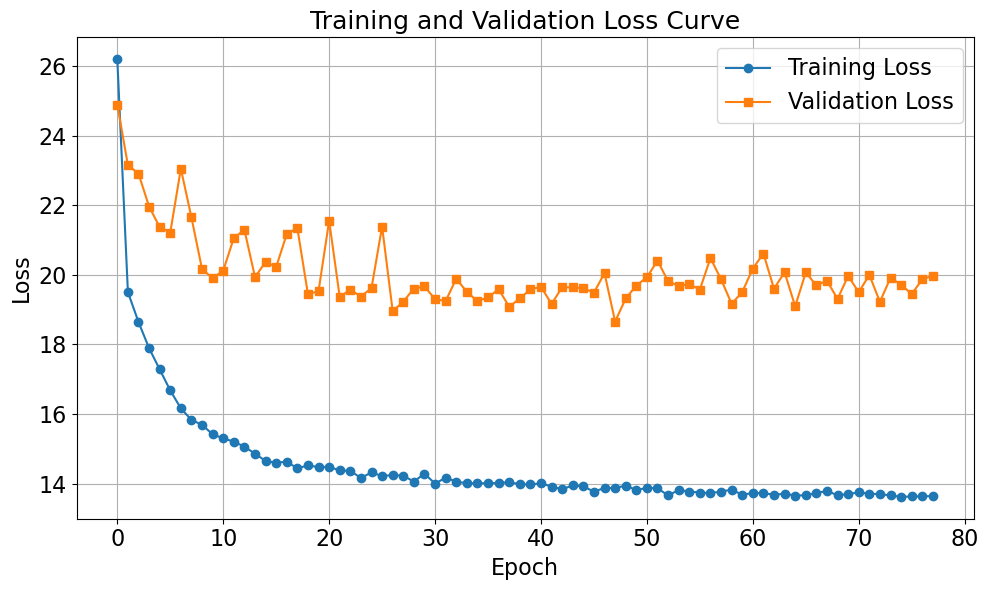

In [4]:


plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')

plt.title('Training and Validation Loss Curve', fontsize=18)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)

# Enlarged legend
plt.legend(fontsize=16)

# Enlarged tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(True)
plt.tight_layout()
plt.show()